In [171]:
import pandas as pd

In [173]:
%run spotipy.ipynb

# Datasets

## Tracks
https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?resource=download&select=tracks.csv

In [4]:
tracks = pd.read_csv('../data/tracks.csv')

In [5]:
tracks = tracks.dropna()

In [6]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          586601 

## Charts
https://www.kaggle.com/datasets/jfreyberg/spotify-chart-data

In [7]:
charts = pd.read_csv('../data/charts.csv')

In [8]:
charts = charts.dropna()

In [9]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5427136 entries, 0 to 5428020
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   country        object
 2   position       int64 
 3   streams        int64 
 4   track_id       object
 5   artists        object
 6   artist_genres  object
 7   duration       int64 
 8   explicit       bool  
 9   name           object
dtypes: bool(1), int64(3), object(6)
memory usage: 419.2+ MB


## Artists

In [10]:
artists = pd.read_csv('../data/artists.csv')

In [11]:
artists = artists.dropna()

In [12]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104333 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104333 non-null  object 
 1   followers   1104333 non-null  float64
 2   genres      1104333 non-null  object 
 3   name        1104333 non-null  object 
 4   popularity  1104333 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 50.6+ MB


# Clusterização

In [3]:
tracks.sort_values('popularity', ascending=False).head()

NameError: name 'tracks' is not defined

In [ ]:
data_dropped = tracks.drop(columns=['id', 'name', 'artists', 'id_artists', 'release_date', 'popularity'])

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

norm_data = scaler.fit_transform(data_dropped.values)

NameError: name 'data_dropped' is not defined

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

data_pca = PCA(n_components=3).fit_transform(norm_data)

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters=60, n_init=4)
kmeans.fit(data_pca)
tracks['n_cluster'] = kmeans.labels_

In [18]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586601 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          586601 

In [19]:
import seaborn as sns

fig = sns.histplot(data=tracks, x="n_cluster")

ModuleNotFoundError: No module named 'seaborn'

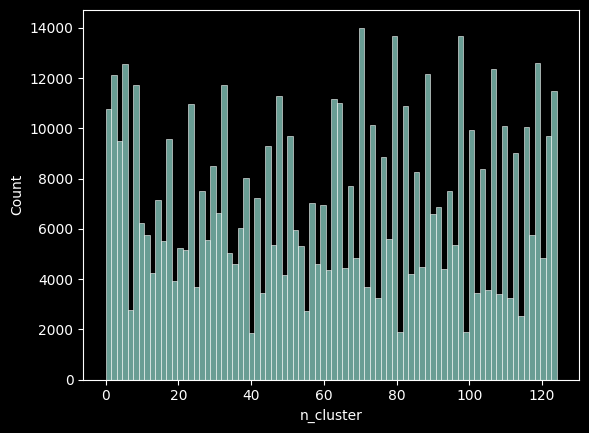

In [ ]:
import seaborn as sns

fig = sns.histplot(data=tracks, x="n_cluster")

# History

## Long History

In [4]:
from itertools import count

# Lendo todos os arquivos relacionados ao histórico de longo prazo

history_group = []

x = 1
while(x):
    try:
        history_group.append(pd.read_json('../data/StreamingHistory'+ str(x-1) +'.json'))
        x += 1
    except FileNotFoundError:
        break

long_history_df = pd.concat(history_group)

In [5]:
# Dropando músicas tocadas por menos de 30 segundos

long_history_df = (
    long_history_df[long_history_df['msPlayed']>=30000]
    .sort_values(by='endTime', ascending=True)
    .reset_index()
    .drop(columns=['index'])
    )

In [6]:
long_history_df['endTime'] = pd.to_datetime(long_history_df['endTime']).map(pd.Timestamp.timestamp)

In [7]:
long_history_df

,endTime,artistName,trackName,msPlayed
0,1.655331e+09,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster,136964
1,1.655397e+09,The Strokes,"Call It Fate, Call It Karma",204773
2,1.655398e+09,Beach House,Space Song,320466
3,1.655398e+09,Journey,Separate Ways (Worlds Apart),323706
4,1.655399e+09,Konai,Perfume,61487
...,...,...,...,...
20731,1.686786e+09,Childish Gambino,Redbone,326933
20732,1.686786e+09,Fleetwood Mac,The Chain - 2004 Remaster,270213
20733,1.686786e+09,Blue Öyster Cult,(Don't Fear) The Reaper,308120
20734,1.686786e+09,Mild High Club,Homage,177493


In [8]:
long_history_tracks_df = long_history_df[['endTime', 'artistName', 'trackName']].drop_duplicates()

In [9]:
long_history_tracks_df

,endTime,artistName,trackName
0,1.655331e+09,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster
1,1.655397e+09,The Strokes,"Call It Fate, Call It Karma"
2,1.655398e+09,Beach House,Space Song
3,1.655398e+09,Journey,Separate Ways (Worlds Apart)
4,1.655399e+09,Konai,Perfume
...,...,...,...
20731,1.686786e+09,Childish Gambino,Redbone
20732,1.686786e+09,Fleetwood Mac,The Chain - 2004 Remaster
20733,1.686786e+09,Blue Öyster Cult,(Don't Fear) The Reaper
20734,1.686786e+09,Mild High Club,Homage


In [10]:
# long_history_tracks_df['track_id'] = long_history_tracks_df.apply(lambda row: get_track_id(row['trackName'], row['artistName']), axis=1)
# long_history_tracks_df.to_csv('../data/track_ids_from_long_history.csv')

In [11]:
long_history_tracks_df = pd.read_csv('../data/track_ids_from_long_history.csv', index_col = 'Unnamed: 0')

In [12]:
long_history_tracks_df[pd.isnull(long_history_tracks_df['track_id'])]

,artistName,trackName,track_id
45,The Pom-Poms,Full Circle,NaN
85,Men At Work,Down Under,NaN
95,Linkin Park,LOST IN THE ECHO,NaN
396,Games We Play,I Hope You’re Happy,NaN
457,Slipknot,(sic),NaN
...,...,...,...
20018,Louis Armstrong,What A Wonderful World,NaN
20138,Matt Maltese,As the World Caves In,NaN
20231,Англия,Ад из красных цветов,NaN
20233,Nürnberg,Los,NaN


In [91]:
long_history_df

,endTime,artistName,trackName,msPlayed
0,1.655331e+09,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster,136964
1,1.655397e+09,The Strokes,"Call It Fate, Call It Karma",204773
2,1.655398e+09,Beach House,Space Song,320466
3,1.655398e+09,Journey,Separate Ways (Worlds Apart),323706
4,1.655399e+09,Konai,Perfume,61487
...,...,...,...,...
20731,1.686786e+09,Childish Gambino,Redbone,326933
20732,1.686786e+09,Fleetwood Mac,The Chain - 2004 Remaster,270213
20733,1.686786e+09,Blue Öyster Cult,(Don't Fear) The Reaper,308120
20734,1.686786e+09,Mild High Club,Homage,177493


In [13]:
long_history_tracks_ids_df = long_history_df[['endTime','artistName', 'trackName']].copy()

In [14]:
long_history_tracks_ids_df = pd.merge(long_history_tracks_ids_df, long_history_tracks_df, how='left', on=['artistName', 'trackName'])

In [15]:
long_history_tracks_ids_df[pd.isnull(long_history_tracks_ids_df['track_id'])]

,endTime,artistName,trackName,track_id
45,1.655482e+09,The Pom-Poms,Full Circle,NaN
57,1.655504e+09,The Pom-Poms,Full Circle,NaN
85,1.655526e+09,Men At Work,Down Under,NaN
95,1.655528e+09,Linkin Park,LOST IN THE ECHO,NaN
396,1.655748e+09,Games We Play,I Hope You’re Happy,NaN
...,...,...,...,...
20558,1.686350e+09,Led Zeppelin,D'yer Mak'er - Remaster,NaN
20564,1.686351e+09,Alex G,Mary,NaN
20578,1.686528e+09,Men At Work,Down Under,NaN
20580,1.686528e+09,The Human League,Don't You Want Me,NaN


In [16]:
long_history_tracks_ids_df = long_history_tracks_ids_df[['endTime', 'track_id']]

In [17]:
long_history_tracks_ids_df = long_history_tracks_ids_df.dropna()

In [18]:
long_history_tracks_ids_df.reset_index(drop=True, inplace=True)

In [19]:
long_history_tracks_ids_df

,endTime,track_id
0,1.655331e+09,1nWyUagJmVzvBGTMDeY73L
1,1.655397e+09,7G8hUONVhvJnkD3Ak8mNF1
2,1.655398e+09,1ujxjsoNvh4XgS2fUNwkZ2
3,1.655398e+09,4ECNtOnqzxutZkXP4TE3n3
4,1.655399e+09,4ZREaPhlA5mqZMFTSQBfzw
...,...,...
20068,1.686786e+09,0WtDGnWL2KrMCk0mI1Gpwz
20069,1.686786e+09,5e9TFTbltYBg2xThimr0rU
20070,1.686786e+09,5QTxFnGygVM4jFQiBovmRo
20071,1.686786e+09,7DcJ6fEBb7BaKuYKTwiDxK


#### gsppy

In [21]:
# from gsppy.gsp import GSP

# transactions = long_history_tracks_ids_df.head(500)['track_id'].copy()

# result = GSP([transactions]).search(0.3)

# result

# # CRASHOU

### Transactions Dataset

In [20]:
long_history_tracks_transactions_df = long_history_tracks_ids_df.copy()

In [21]:
long_history_tracks_transactions_df

,endTime,track_id
0,1.655331e+09,1nWyUagJmVzvBGTMDeY73L
1,1.655397e+09,7G8hUONVhvJnkD3Ak8mNF1
2,1.655398e+09,1ujxjsoNvh4XgS2fUNwkZ2
3,1.655398e+09,4ECNtOnqzxutZkXP4TE3n3
4,1.655399e+09,4ZREaPhlA5mqZMFTSQBfzw
...,...,...
20068,1.686786e+09,0WtDGnWL2KrMCk0mI1Gpwz
20069,1.686786e+09,5e9TFTbltYBg2xThimr0rU
20070,1.686786e+09,5QTxFnGygVM4jFQiBovmRo
20071,1.686786e+09,7DcJ6fEBb7BaKuYKTwiDxK


In [22]:
long_history_tracks_transactions_df = long_history_tracks_ids_df.copy()

long_history_tracks_transactions_df = long_history_tracks_transactions_df.rename(columns={'endTime': 'end_time', 'track_id': 'track_id_1'})

TRANSACTION_SIZE = 10
total_offsets = TRANSACTION_SIZE - 1

for x in range(total_offsets):
    # print(long_history_tracks_transactions_df[f'track_id_{x+1}'].shift(-1).ffill())
    long_history_tracks_transactions_df[f'track_id_{x+2}'] = long_history_tracks_transactions_df[f'track_id_{x+1}'].shift(-1).ffill()
    # long_history_tracks_transactions_df[f'track_id_2'] = long_history_tracks_transactions_df['track_id_1'].shift(-1).ffill()
    # long_history_tracks_transactions_df['track_id_3'] = long_history_tracks_transactions_df['track_id_2'].shift(-1).ffill()
    # long_history_tracks_transactions_df['track_id_4'] = long_history_tracks_transactions_df['track_id_3'].shift(-1).ffill()
    # long_history_tracks_transactions_df['track_id_5'] = long_history_tracks_transactions_df['track_id_4'].shift(-1).ffill()

In [23]:
long_history_tracks_transactions_df

,end_time,track_id_1,track_id_2,track_id_3,track_id_4,track_id_5,track_id_6,track_id_7,track_id_8,track_id_9,track_id_10
0,1.655331e+09,1nWyUagJmVzvBGTMDeY73L,7G8hUONVhvJnkD3Ak8mNF1,1ujxjsoNvh4XgS2fUNwkZ2,4ECNtOnqzxutZkXP4TE3n3,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb
1,1.655397e+09,7G8hUONVhvJnkD3Ak8mNF1,1ujxjsoNvh4XgS2fUNwkZ2,4ECNtOnqzxutZkXP4TE3n3,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb,7fTsKBsnYyk0IG0zVNduEM
2,1.655398e+09,1ujxjsoNvh4XgS2fUNwkZ2,4ECNtOnqzxutZkXP4TE3n3,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb,7fTsKBsnYyk0IG0zVNduEM,31AOj9sFz2gM0O3hMARRBx
3,1.655398e+09,4ECNtOnqzxutZkXP4TE3n3,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb,7fTsKBsnYyk0IG0zVNduEM,31AOj9sFz2gM0O3hMARRBx,4bec9kNL2dc6ajcwmaIh2t
4,1.655399e+09,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb,7fTsKBsnYyk0IG0zVNduEM,31AOj9sFz2gM0O3hMARRBx,4bec9kNL2dc6ajcwmaIh2t,3jNGLTOcA4a34rZD2y392C
...,...,...,...,...,...,...,...,...,...,...,...
20068,1.686786e+09,0WtDGnWL2KrMCk0mI1Gpwz,5e9TFTbltYBg2xThimr0rU,5QTxFnGygVM4jFQiBovmRo,7DcJ6fEBb7BaKuYKTwiDxK,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB
20069,1.686786e+09,5e9TFTbltYBg2xThimr0rU,5QTxFnGygVM4jFQiBovmRo,7DcJ6fEBb7BaKuYKTwiDxK,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB
20070,1.686786e+09,5QTxFnGygVM4jFQiBovmRo,7DcJ6fEBb7BaKuYKTwiDxK,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB
20071,1.686786e+09,7DcJ6fEBb7BaKuYKTwiDxK,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB,7MXVkk9YMctZqd1Srtv4MB


In [24]:
long_history_tracks_transactions_df.drop(
    long_history_tracks_transactions_df.tail(total_offsets).index,
    inplace = True
    )

In [25]:
long_history_tracks_transactions_df = long_history_tracks_transactions_df.drop(columns='end_time')

In [26]:
long_history_tracks_transactions_df

,track_id_1,track_id_2,track_id_3,track_id_4,track_id_5,track_id_6,track_id_7,track_id_8,track_id_9,track_id_10
0,1nWyUagJmVzvBGTMDeY73L,7G8hUONVhvJnkD3Ak8mNF1,1ujxjsoNvh4XgS2fUNwkZ2,4ECNtOnqzxutZkXP4TE3n3,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb
1,7G8hUONVhvJnkD3Ak8mNF1,1ujxjsoNvh4XgS2fUNwkZ2,4ECNtOnqzxutZkXP4TE3n3,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb,7fTsKBsnYyk0IG0zVNduEM
2,1ujxjsoNvh4XgS2fUNwkZ2,4ECNtOnqzxutZkXP4TE3n3,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb,7fTsKBsnYyk0IG0zVNduEM,31AOj9sFz2gM0O3hMARRBx
3,4ECNtOnqzxutZkXP4TE3n3,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb,7fTsKBsnYyk0IG0zVNduEM,31AOj9sFz2gM0O3hMARRBx,4bec9kNL2dc6ajcwmaIh2t
4,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb,7fTsKBsnYyk0IG0zVNduEM,31AOj9sFz2gM0O3hMARRBx,4bec9kNL2dc6ajcwmaIh2t,3jNGLTOcA4a34rZD2y392C
...,...,...,...,...,...,...,...,...,...,...
20059,5mVYvilgRiCvztnnjGW0Ef,6DjKWVAqXUvMaAzO4U4CIo,2CoKGyZavJWTFUPyvWoj0b,7lzfMZak2HjNPXXSxksjPB,2CoKGyZavJWTFUPyvWoj0b,5mVYvilgRiCvztnnjGW0Ef,7tCHpjktA50ihtkLz6bAnn,4Hff1IjRbLGeLgFgxvHflk,1FIZ46Wub1ATu99bNtbjGo,0WtDGnWL2KrMCk0mI1Gpwz
20060,6DjKWVAqXUvMaAzO4U4CIo,2CoKGyZavJWTFUPyvWoj0b,7lzfMZak2HjNPXXSxksjPB,2CoKGyZavJWTFUPyvWoj0b,5mVYvilgRiCvztnnjGW0Ef,7tCHpjktA50ihtkLz6bAnn,4Hff1IjRbLGeLgFgxvHflk,1FIZ46Wub1ATu99bNtbjGo,0WtDGnWL2KrMCk0mI1Gpwz,5e9TFTbltYBg2xThimr0rU
20061,2CoKGyZavJWTFUPyvWoj0b,7lzfMZak2HjNPXXSxksjPB,2CoKGyZavJWTFUPyvWoj0b,5mVYvilgRiCvztnnjGW0Ef,7tCHpjktA50ihtkLz6bAnn,4Hff1IjRbLGeLgFgxvHflk,1FIZ46Wub1ATu99bNtbjGo,0WtDGnWL2KrMCk0mI1Gpwz,5e9TFTbltYBg2xThimr0rU,5QTxFnGygVM4jFQiBovmRo
20062,7lzfMZak2HjNPXXSxksjPB,2CoKGyZavJWTFUPyvWoj0b,5mVYvilgRiCvztnnjGW0Ef,7tCHpjktA50ihtkLz6bAnn,4Hff1IjRbLGeLgFgxvHflk,1FIZ46Wub1ATu99bNtbjGo,0WtDGnWL2KrMCk0mI1Gpwz,5e9TFTbltYBg2xThimr0rU,5QTxFnGygVM4jFQiBovmRo,7DcJ6fEBb7BaKuYKTwiDxK


In [27]:
long_history_tracks_transactions_df = long_history_tracks_transactions_df.iloc[::5, :]

In [28]:
long_history_tracks_transactions_df

,track_id_1,track_id_2,track_id_3,track_id_4,track_id_5,track_id_6,track_id_7,track_id_8,track_id_9,track_id_10
0,1nWyUagJmVzvBGTMDeY73L,7G8hUONVhvJnkD3Ak8mNF1,1ujxjsoNvh4XgS2fUNwkZ2,4ECNtOnqzxutZkXP4TE3n3,4ZREaPhlA5mqZMFTSQBfzw,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb
5,0sMra9TqwOskuvn4eR11n3,0kzLLyvKx3eVQzSX2RNvNK,0WtDGnWL2KrMCk0mI1Gpwz,3BmGfswCrv2p1It4oCdtU6,7H7NyZ3G075GqPx2evsfeb,7fTsKBsnYyk0IG0zVNduEM,31AOj9sFz2gM0O3hMARRBx,4bec9kNL2dc6ajcwmaIh2t,3jNGLTOcA4a34rZD2y392C,1IqF5PUDUnaykHLs0RWbDO
10,7fTsKBsnYyk0IG0zVNduEM,31AOj9sFz2gM0O3hMARRBx,4bec9kNL2dc6ajcwmaIh2t,3jNGLTOcA4a34rZD2y392C,1IqF5PUDUnaykHLs0RWbDO,1VuRxVYsI9hVybSTxVUYoA,1VuRxVYsI9hVybSTxVUYoA,38mecB29TH0gTqIxhM4OK1,4atMrAadB7dS8xn9vfk9PQ,4gUvuvhWfCbaRMXfC1jvi8
15,1VuRxVYsI9hVybSTxVUYoA,1VuRxVYsI9hVybSTxVUYoA,38mecB29TH0gTqIxhM4OK1,4atMrAadB7dS8xn9vfk9PQ,4gUvuvhWfCbaRMXfC1jvi8,2QjOHCTQ1Jl3zawyYOpxh6,399Q1xbJf0oTiB2Tr2L5f3,2PHONNW4Knw22LQ9o3EvIo,73C4In4b1ICegtmEJIyymj,0AsfpL8bzbmEyJsfbPPYnj
20,2QjOHCTQ1Jl3zawyYOpxh6,399Q1xbJf0oTiB2Tr2L5f3,2PHONNW4Knw22LQ9o3EvIo,73C4In4b1ICegtmEJIyymj,0AsfpL8bzbmEyJsfbPPYnj,2udGjDmpK1dH9VGyw7nrei,6i8SZ4NIrYeyrbBOoRSC9z,5asbJnP2OL9tPGGXX1efu7,2w3ScXudq4aD3K5HFO5xvx,0wwPcA6wtMf6HUMpIRdeP7
...,...,...,...,...,...,...,...,...,...,...
20040,2vNUATEUKbavRo2gMjHs2S,2xOwDv18iuRmDI7akoJ250,68osIGtVjM7QWVe6pazLHj,3iV11AiIEDIOVjKy3kgjld,2RaA6kIcvomt77qlIgGhCT,0M3adYbGtyRHACP86dey1H,1yYE8EyuIV0rrvQ1bA2Fyf,0ceW5TkemJUEmJERavfqQq,7CAbF0By0Fpnbiu6Xn5ZF7,36xBFaVGjqm7le8CTHytUj
20045,0M3adYbGtyRHACP86dey1H,1yYE8EyuIV0rrvQ1bA2Fyf,0ceW5TkemJUEmJERavfqQq,7CAbF0By0Fpnbiu6Xn5ZF7,36xBFaVGjqm7le8CTHytUj,36xBFaVGjqm7le8CTHytUj,7CAbF0By0Fpnbiu6Xn5ZF7,47enw9R1hdkfuxeSjoDQ0N,5axwj3ekvw85989jjO8Ov8,43TfOO2Dspo5zj2PpH6M84
20050,36xBFaVGjqm7le8CTHytUj,7CAbF0By0Fpnbiu6Xn5ZF7,47enw9R1hdkfuxeSjoDQ0N,5axwj3ekvw85989jjO8Ov8,43TfOO2Dspo5zj2PpH6M84,7AcefBF4taQY42JqWnfhTV,3EjxAbEOH28icEK1ZFOUSh,5JpyE359EeMFUxMNlitKqq,5sudtP2ME6aIHN20glKW0k,5mVYvilgRiCvztnnjGW0Ef
20055,7AcefBF4taQY42JqWnfhTV,3EjxAbEOH28icEK1ZFOUSh,5JpyE359EeMFUxMNlitKqq,5sudtP2ME6aIHN20glKW0k,5mVYvilgRiCvztnnjGW0Ef,6DjKWVAqXUvMaAzO4U4CIo,2CoKGyZavJWTFUPyvWoj0b,7lzfMZak2HjNPXXSxksjPB,2CoKGyZavJWTFUPyvWoj0b,5mVYvilgRiCvztnnjGW0Ef


In [29]:
long_history_tracks_ids_df.tail(13)

,endTime,track_id
20060,1.686779e+09,6DjKWVAqXUvMaAzO4U4CIo
20061,1.686779e+09,2CoKGyZavJWTFUPyvWoj0b
20062,1.686780e+09,7lzfMZak2HjNPXXSxksjPB
20063,1.686780e+09,2CoKGyZavJWTFUPyvWoj0b
20064,1.686781e+09,5mVYvilgRiCvztnnjGW0Ef
20065,1.686785e+09,7tCHpjktA50ihtkLz6bAnn
20066,1.686785e+09,4Hff1IjRbLGeLgFgxvHflk
20067,1.686785e+09,1FIZ46Wub1ATu99bNtbjGo
20068,1.686786e+09,0WtDGnWL2KrMCk0mI1Gpwz
20069,1.686786e+09,5e9TFTbltYBg2xThimr0rU


#### apriori

In [123]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules


transactions = long_history_tracks_transactions_df.values.tolist()

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.001, use_colnames=True)


In [80]:
ar_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

In [81]:
ar_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
get_track_features(['1nDCZBI8MaHXI2f36dnQyG', '02U2HxItROptvGJ5NPReWz'])

,track_id,track_name,popularity,duration_ms,explicit,artists_name,artists_id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1nDCZBI8MaHXI2f36dnQyG,Rita,54,156630,False,[Tierry],[4FUMTycjZlEY6ZxMgqNjC8],2020-07-17,0.512,0.677,11,-3.909,1,0.0680,0.212,0,0.430,0.776,132.241,4
0,02U2HxItROptvGJ5NPReWz,A Roça ou a Cidade (Da Roça Pra Cidade) - Ao Vivo,49,180615,False,[Os Barões Da Pisadinha],[5Lv2GUVwqmQBPwrTrxucE5],2021-02-06,0.602,0.962,6,-2.375,0,0.0621,0.293,0,0.156,0.835,172.201,4


#### spmf (prefixspan)

In [30]:
from spmf import Spmf

input_list = long_history_tracks_transactions_df.apply(lambda row: ' '.join(row)+' .', axis=1)
# input_list = long_history_tracks_ids_df.head(50)['track_id'].tolist()
input_txt = ' '.join(input_list)

In [31]:
input_txt

'1nWyUagJmVzvBGTMDeY73L 7G8hUONVhvJnkD3Ak8mNF1 1ujxjsoNvh4XgS2fUNwkZ2 4ECNtOnqzxutZkXP4TE3n3 4ZREaPhlA5mqZMFTSQBfzw 0sMra9TqwOskuvn4eR11n3 0kzLLyvKx3eVQzSX2RNvNK 0WtDGnWL2KrMCk0mI1Gpwz 3BmGfswCrv2p1It4oCdtU6 7H7NyZ3G075GqPx2evsfeb . 0sMra9TqwOskuvn4eR11n3 0kzLLyvKx3eVQzSX2RNvNK 0WtDGnWL2KrMCk0mI1Gpwz 3BmGfswCrv2p1It4oCdtU6 7H7NyZ3G075GqPx2evsfeb 7fTsKBsnYyk0IG0zVNduEM 31AOj9sFz2gM0O3hMARRBx 4bec9kNL2dc6ajcwmaIh2t 3jNGLTOcA4a34rZD2y392C 1IqF5PUDUnaykHLs0RWbDO . 7fTsKBsnYyk0IG0zVNduEM 31AOj9sFz2gM0O3hMARRBx 4bec9kNL2dc6ajcwmaIh2t 3jNGLTOcA4a34rZD2y392C 1IqF5PUDUnaykHLs0RWbDO 1VuRxVYsI9hVybSTxVUYoA 1VuRxVYsI9hVybSTxVUYoA 38mecB29TH0gTqIxhM4OK1 4atMrAadB7dS8xn9vfk9PQ 4gUvuvhWfCbaRMXfC1jvi8 . 1VuRxVYsI9hVybSTxVUYoA 1VuRxVYsI9hVybSTxVUYoA 38mecB29TH0gTqIxhM4OK1 4atMrAadB7dS8xn9vfk9PQ 4gUvuvhWfCbaRMXfC1jvi8 2QjOHCTQ1Jl3zawyYOpxh6 399Q1xbJf0oTiB2Tr2L5f3 2PHONNW4Knw22LQ9o3EvIo 73C4In4b1ICegtmEJIyymj 0AsfpL8bzbmEyJsfbPPYnj . 2QjOHCTQ1Jl3zawyYOpxh6 399Q1xbJf0oTiB2Tr2L5f3 2PHONNW4Knw22LQ9o3EvIo 73

In [32]:
len(input_list)

4013

In [50]:
spmf = Spmf("PrefixSpan", input_direct=input_txt, input_type="text",output_filename="output.txt", arguments=[0.001])

spmf.run()

patterns_df = spmf.to_pandas_dataframe()
spmf.to_csv("output.csv")

# # NÃO FUNCIONOU

>/home/lga/.local/lib/python3.11/site-packages/spmf/spmf.jar
Converting TEXT to SPMF format.
Conversion completed.
=============  PREFIXSPAN 0.99-2016 - STATISTICS =============
 Total time ~ 150 ms
 Frequent sequences count : 5074
 Max memory (mb) : 79.98885345458984
 minsup = 5 sequences.
 Pattern count : 5074

Post-processing to show result in terms of string values.
Post-processing completed.



In [120]:
patterns_gt2_df = patterns_df[patterns_df['pattern'].str.len() >= 2]

In [125]:
currently_playing_id = get_currently_playing()['Track ID'].iloc[-1].lower()

In [131]:
best_patterns_df = patterns_gt2_df[patterns_gt2_df['pattern'].apply(lambda x: currently_playing_id in x)].sort_values('sup', ascending=False).head(5)

In [158]:
def get_track_features_lower_id(track_id):
    normal_track_id = long_history_tracks_ids_df[long_history_tracks_ids_df['track_id'].str.lower() == track_id]['track_id'].iloc[-1]
    return get_track_features(normal_track_id)

In [ ]:
get_track_features_lower_id()

In [140]:
guesses_df = best_patterns_df.copy()

In [141]:
guesses_df = guesses_df.explode('pattern')

In [142]:
guesses_df = guesses_df[guesses_df['pattern'] != currently_playing_id]

In [156]:
guesses_features_df = guesses_df.apply(lambda x: get_track_features_lower_id(x['pattern']), axis=1)

In [157]:
guesses_features_df

1704                     track_id                track...
2381                     track_id                track...
1691                     track_id                     ...
1659                     track_id          track_name ...
1709                     track_id    track_name  popul...
dtype: object

In [147]:
guesses_df

,pattern,sup
1704,1upykeocjnzzl9c8lusqqh,22
2381,1upykeocjnzzl9c8lusqqh,20
1691,3qae7ypzhnzzqxojkcghd9,16
1659,3ni0pisoxaik2rcphglob7,14
1709,3rafcubrcnaborxop3s5t1,14


,track_id,track_name,popularity,duration_ms,explicit,artists_name,artists_id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,50BLTf1U0LHzxYc4M6clwC,"Farra, Pinga e Foguete",60,162377,True,[Bruno & Barretto],[70x9rYb58QCNNeNxuO3StS],2015-06-30,0.606,0.818,9,-4.426,1,0.276,0.14,0,0.369,0.507,96.001,4


## Getting Currently Playing Associated Musics

In [213]:
currently_playing_df = get_currently_playing()

In [214]:
currently_playing_df

,Context Type,URI,Track Name,Track ID,Album Name,Album ID,Artist Names,Artist IDs
0,playlist,spotify:playlist:3MGkjqpqSwncNrpArhHpiA,Click Click Boom,2CGDxXXYbkPOyRXHzQbqkT,Every Six Seconds,6gF0b1XROfpwz5bLHM1dRe,[Saliva],[5S6hjAxgxjsLylsTtMIimO]


In [215]:
currently_playing_features = get_track_features(currently_playing_df['Track ID'].iloc[-1])

In [216]:

if currently_playing_df['Context Type'].iloc[-1] == 'playlist':
    candidates = get_track_features(get_playlist_items(currently_playing_df['URI'].iloc[-1])['Track ID'].tolist())

elif currently_playing_df['Context Type'].iloc[-1] == 'collection':
    candidates = get_track_features(get_all_current_user_saved_tracks())

elif currently_playing_df['Context Type'].iloc[-1] == 'artist':
    candidates = get_track_features(get_artist_top_tracks(currently_playing_df['URI'].iloc[-1])['Track ID'].tolist())

elif currently_playing_df['Context Type'].iloc[-1] == None:
    candidates = get_track_features(get_artist_top_tracks(currently_playing_features['artists_id'].iloc[-1][0]))

elif currently_playing_df['Context Type'].iloc[-1] == 'album':
    candidates = get_track_features(get_album_tracks(currently_playing_df['URI'].iloc[-1])['Track ID'].tolist())

In [231]:
similarity_columns = ['popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

In [218]:
comparison_df = candidates.copy()

In [220]:
candidates

,track_id,track_name,popularity,duration_ms,explicit,artists_name,artists_id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,464HG7mt7NNKtKY0Hco8Y8,For You,64,206200,True,[Staind],[5KDIH2gF0VpelTqyQS7udb],2001-05-22,0.318,0.958,10,-2.683,1,0.4420,0.060300,0.000005,0.0981,0.300,163.089,4
0,6Nm8h73ycDG2saCnZV8poF,Dragula,81,222827,False,[Rob Zombie],[3HVdAiMNjYrQIKlOGxoGh5],1998-01-01,0.591,0.963,0,-6.489,0,0.0531,0.000087,0.000107,0.0781,0.609,125.030,4
0,0CA3RxBx2xSQXPfpmUBK1v,Just Like You,68,186893,False,[Three Days Grace],[2xiIXseIJcq3nG7C8fHeBj],2003-04-19,0.373,0.737,1,-5.282,1,0.0297,0.000009,0.000000,0.0696,0.565,177.900,4
0,1AEYT6VxrxXPMoQUxsY0E4,Headstrong,75,285570,True,[Trapt],[1UdQqCUR7RwB9YYJONwbdM],2002-11-05,0.492,0.896,4,-5.819,0,0.1170,0.000172,0.000003,0.1890,0.534,184.981,4
0,24Pi0KCtYWtnKxxzopkcPG,Get Stoned,64,218307,False,[Hinder],[6BMhCQJYHxxKAeqYS1p5rY],2005,0.448,0.933,7,-4.082,0,0.0421,0.000417,0.000454,0.2190,0.505,75.991,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3e2KBwxibC1rq4bA5TNKW2,Psycho,68,210653,False,[Puddle Of Mudd],[3dXaa6jwM7B52GZpaJEIr5],2007-01-01,0.573,0.897,1,-3.549,1,0.0553,0.004730,0.000000,0.2780,0.463,126.034,4
0,1aC1IBAETh2XYGOE8kCC6t,Loser,64,264800,False,[3 Doors Down],[2RTUTCvo6onsAnheUk3aL9],2000,0.493,0.880,6,-6.424,0,0.0693,0.010800,0.000027,0.2260,0.389,147.913,4
0,2cCWbBmadLbKvr9xddC79R,Too Bad,63,232240,False,[Nickelback],[6deZN1bslXzeGvOLaLMOIF],2001-09-11,0.598,0.808,10,-5.209,1,0.0388,0.003040,0.000000,0.1470,0.288,128.025,4
0,0UrWr7Jnu1heq1o99ZwUd0,Youth of the Nation,74,256240,False,[P.O.D.],[6KO6G41BBLTDNYOLefWTMU],2001-09-11,0.563,0.860,8,-7.533,1,0.0621,0.008340,0.010600,0.3900,0.517,97.867,4


In [230]:
div_df = currently_playing_features[similarity_columns]

KeyError: "None of [Index([('popularitydanceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo')], dtype='object')] are in the [columns]"

In [226]:
currently_playing_features[similarity_columns]

KeyError: "['popularitydanceability'] not in index"

In [232]:
comparison_df[similarity_columns] = candidates[similarity_columns].div(currently_playing_features[similarity_columns].values[0])

In [233]:
comparison_df['similarity'] = comparison_df[similarity_columns].sum(axis=1)

In [246]:
comparison_df.drop_duplicates(subset='track_id').sort_values('similarity')

,track_id,track_name,popularity,duration_ms,explicit,artists_name,artists_id,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,similarity
0,0CwYG1UnRmOx8Q1EzElCIL,Second Chance,1.013889,222067,False,[Shinedown],[70BYFdaZbEKbeauJ670ysI],2008-06-24,0.755337,0.851337,...,1.530432,0.0,0.695198,0.368966,0.000000,0.563830,0.365462,1.042248,4,7.186698
0,0Q9f1NBvKCC37V4oJVEgCh,Breakdown,0.888889,209267,False,[Seether],[6B5c4sch27tWHAGdarpPaW],2007-01-01,0.684729,0.931551,...,1.203672,1.0,0.814196,0.166552,0.095543,0.461170,0.377510,1.479861,4,8.270340
0,23SlyxzUtQtExgEButcOtR,Save Me,0.861111,213933,False,[Shinedown],[70BYFdaZbEKbeauJ670ysI],2005-10-04,0.860427,0.872727,...,1.186671,0.0,0.643006,0.151724,0.000000,0.413298,0.506024,1.209146,4,8.537468
0,1ZtVN326V42hioNyRjU4P2,Colors,0.930556,198533,False,[Crossfade],[4IR8ZkpbyyKrqsIzchF3NB],2004-04-13,0.553366,0.893048,...,2.159470,0.0,1.189979,0.600000,0.000000,0.502660,0.839357,0.912502,4,8.914271
0,5BHfKRD3LTxFz1tX8AH0DN,Black Hole Sun,0.680556,317693,False,[Soundgarden],[5xUf6j4upBrXZPg6AI4MRK],2010-09-28,0.555008,0.786096,...,2.341380,1.0,0.739040,0.027793,0.083565,0.389362,0.307229,1.096241,4,9.006270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0IKrRO3XzvMvy9VzAjg395,Long Cool Woman (In A Black Dress),0.791667,175694,False,[Eastern Thrills],[7rvhhrFPLui1EZewolgYjE],2022-11-18,0.937603,0.870588,...,1.974838,0.0,1.645094,190.000000,0.000000,1.984043,1.445783,1.445835,4,202.928784
0,1MYuNM7cGov6vUEpnUvhrI,Mercy Of The Moon,0.375000,236252,False,[Al Staehely],[07w4ZYcEBFLyGnkRsS09yx],2023-06-30,1.029557,0.189305,...,5.140088,1.0,0.766180,202.413793,3.203343,1.505319,0.584337,1.324510,4,218.198098
0,6WHrPC6ifZtKOoudTLa92r,Fishing In The Dark,0.819444,155613,False,[Highway Outlaws],[2Ybu73UuK2KUtC0UUusu9T],2023-03-06,1.236453,0.540107,...,2.756885,1.0,0.876827,253.448276,0.000000,0.423936,1.797189,0.812895,4,264.045346
0,1k0FCgVwb1jZR57ESOWUVa,It Only Hurts,0.763889,222707,False,[Default],[4nCzT3o7lMgCWBcmdwCMsT],2005-10-05,0.857143,0.831016,...,1.376063,1.0,0.572025,0.204483,718.662953,1.521277,1.008032,1.020280,4,728.650493


In [234]:
candidates

,track_id,track_name,popularity,duration_ms,explicit,artists_name,artists_id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,464HG7mt7NNKtKY0Hco8Y8,For You,64,206200,True,[Staind],[5KDIH2gF0VpelTqyQS7udb],2001-05-22,0.318,0.958,10,-2.683,1,0.4420,0.060300,0.000005,0.0981,0.300,163.089,4
0,6Nm8h73ycDG2saCnZV8poF,Dragula,81,222827,False,[Rob Zombie],[3HVdAiMNjYrQIKlOGxoGh5],1998-01-01,0.591,0.963,0,-6.489,0,0.0531,0.000087,0.000107,0.0781,0.609,125.030,4
0,0CA3RxBx2xSQXPfpmUBK1v,Just Like You,68,186893,False,[Three Days Grace],[2xiIXseIJcq3nG7C8fHeBj],2003-04-19,0.373,0.737,1,-5.282,1,0.0297,0.000009,0.000000,0.0696,0.565,177.900,4
0,1AEYT6VxrxXPMoQUxsY0E4,Headstrong,75,285570,True,[Trapt],[1UdQqCUR7RwB9YYJONwbdM],2002-11-05,0.492,0.896,4,-5.819,0,0.1170,0.000172,0.000003,0.1890,0.534,184.981,4
0,24Pi0KCtYWtnKxxzopkcPG,Get Stoned,64,218307,False,[Hinder],[6BMhCQJYHxxKAeqYS1p5rY],2005,0.448,0.933,7,-4.082,0,0.0421,0.000417,0.000454,0.2190,0.505,75.991,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,3e2KBwxibC1rq4bA5TNKW2,Psycho,68,210653,False,[Puddle Of Mudd],[3dXaa6jwM7B52GZpaJEIr5],2007-01-01,0.573,0.897,1,-3.549,1,0.0553,0.004730,0.000000,0.2780,0.463,126.034,4
0,1aC1IBAETh2XYGOE8kCC6t,Loser,64,264800,False,[3 Doors Down],[2RTUTCvo6onsAnheUk3aL9],2000,0.493,0.880,6,-6.424,0,0.0693,0.010800,0.000027,0.2260,0.389,147.913,4
0,2cCWbBmadLbKvr9xddC79R,Too Bad,63,232240,False,[Nickelback],[6deZN1bslXzeGvOLaLMOIF],2001-09-11,0.598,0.808,10,-5.209,1,0.0388,0.003040,0.000000,0.1470,0.288,128.025,4
0,0UrWr7Jnu1heq1o99ZwUd0,Youth of the Nation,74,256240,False,[P.O.D.],[6KO6G41BBLTDNYOLefWTMU],2001-09-11,0.563,0.860,8,-7.533,1,0.0621,0.008340,0.010600,0.3900,0.517,97.867,4


In [183]:
album_tracks = get_album_tracks(currently_playing_df['URI'].iloc[-1])

In [184]:
album_tracks

,Artist Name,Artist ID,Track Name,Track ID
0,[Slipknot],[05fG473iIaoy82BF1aGhL8],(515),5IcKIrmgAhaevCJ8dGQ4jE
1,[Slipknot],[05fG473iIaoy82BF1aGhL8],People = Shit,0Y2i84QWPFiFHQfEQDgHya
2,[Slipknot],[05fG473iIaoy82BF1aGhL8],Disasterpiece,47VSmPTydr0saGjbQGwCeg
3,[Slipknot],[05fG473iIaoy82BF1aGhL8],My Plague,74WIE2htPZwxx4HgGhpf8i
4,[Slipknot],[05fG473iIaoy82BF1aGhL8],Everything Ends,11SQnfm9cxgIjRREQWgbsP
5,[Slipknot],[05fG473iIaoy82BF1aGhL8],The Heretic Anthem,3OYZWMm5m2DEwq2Tc1ukTh
6,[Slipknot],[05fG473iIaoy82BF1aGhL8],Gently,00WbLoO3bSlUdAy8al106S
7,[Slipknot],[05fG473iIaoy82BF1aGhL8],Left Behind,4l3Vmsw0KO8HJqFtnbqaqu
8,[Slipknot],[05fG473iIaoy82BF1aGhL8],The Shape,7oq2elG5ZmLVOkyoETo12d
9,[Slipknot],[05fG473iIaoy82BF1aGhL8],I Am Hated,1hrDDgkVbbS5bySL8uHLh3


In [194]:
get_track_features(album_tracks['Track ID'].tolist())

,track_id,track_name,popularity,duration_ms,explicit,artists_name,artists_id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5IcKIrmgAhaevCJ8dGQ4jE,(515),49,59893,False,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.3120,0.529,0,-12.228,1,0.0556,0.000028,0.811000,0.2270,0.0819,113.048,3
0,0Y2i84QWPFiFHQfEQDgHya,People = Shit,73,215600,True,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.4620,0.996,11,-2.973,0,0.2310,0.000058,0.003770,0.1390,0.1450,122.072,4
0,47VSmPTydr0saGjbQGwCeg,Disasterpiece,66,308307,True,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.3950,0.988,11,-4.063,0,0.2460,0.000128,0.000244,0.1340,0.1890,107.684,4
0,74WIE2htPZwxx4HgGhpf8i,My Plague,64,220293,True,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.2790,0.993,11,-2.670,0,0.2090,0.000278,0.000394,0.1970,0.1070,88.553,4
0,11SQnfm9cxgIjRREQWgbsP,Everything Ends,61,254107,True,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.4670,0.992,11,-3.218,0,0.1750,0.000078,0.001750,0.4100,0.3170,115.209,4
0,3OYZWMm5m2DEwq2Tc1ukTh,The Heretic Anthem,68,254000,True,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.4510,0.993,1,-4.143,1,0.1850,0.000562,0.004790,0.1520,0.1400,100.827,4
0,00WbLoO3bSlUdAy8al106S,Gently,52,294000,False,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.2950,0.961,2,-4.605,1,0.0997,0.000024,0.670000,0.2030,0.1960,136.882,4
0,4l3Vmsw0KO8HJqFtnbqaqu,Left Behind,68,241467,False,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.2290,0.994,6,-3.431,1,0.2200,0.000070,0.005480,0.3180,0.1150,156.623,4
0,7oq2elG5ZmLVOkyoETo12d,The Shape,53,217667,True,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.3630,0.993,7,-3.316,1,0.1930,0.000105,0.000473,0.1390,0.2130,109.222,4
0,1hrDDgkVbbS5bySL8uHLh3,I Am Hated,54,157827,True,[Slipknot],[05fG473iIaoy82BF1aGhL8],2001,0.4350,0.986,7,-3.458,1,0.1820,0.000083,0.000924,0.5720,0.4340,125.822,4


In [192]:
get_track_features(get_album_tracks(currently_playing_df['Track ID'].iloc[-1]))

HTTP Error for GET to https://api.spotify.com/v1/albums/0OFQwUVOYXn4E8scJq0PAc/tracks/ with Params: {'limit': 50, 'offset': 0, 'market': None} returned 404 due to Non existing id: '0OFQwUVOYXn4E8scJq0PAc'


SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/albums/0OFQwUVOYXn4E8scJq0PAc/tracks/?limit=50&offset=0:
 Non existing id: '0OFQwUVOYXn4E8scJq0PAc', reason: None

## Recent History

In [ ]:
recent_history_df = get_current_user_recently_played()

In [ ]:
recent_history_df

## Saved Tracks

In [ ]:
saved_tracks_df = get_all_current_user_saved_tracks()
# gets ~86 tracks per second

In [ ]:
saved_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 0 to 37
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist Name  1188 non-null   object
 1   Artist ID    1188 non-null   object
 2   Track Name   1188 non-null   object
 3   Track ID     1188 non-null   object
dtypes: object(4)
memory usage: 46.4+ KB


## Currently Playing

In [ ]:
currently_playing_df = get_currently_playing()

In [ ]:
currently_playing_df

,Context Type,URI,Track Name,Track ID,Album Name,Album ID,Artist Names,Artist IDs
0,artist,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,Best Friends - Remix,6I5gj0D4OEScl48BPFR0J1,Dawn FM (Alternate World),12INlMsFtBjyehNnawBv36,"[The Weeknd, Summer Walker]","[1Xyo4u8uXC1ZmMpatF05PJ, 57LYzLEk2LcFghVwuWbcuS]"


# Algorithm

## Steps:

1. currently playing
2. selecting track scope
   1. songs from long history arules
   2. songs from the same artist that matches long history arules features (recommendation endpoint)
   3. songs from playlist that matches long history arules features
   4. songs from saved that matches long history arules features
   5. songs from similar artists that matches long history arules features
   6. removing recent history songs
3. evaluating tracks from last step accordingly to environment sentment analysis
   1. image emotion analysis (how the image affects humans) is an AI field barely developed
4. classificating tracks
   1. (modifier) prioritize context tracks (artist/album/playlist/saved) OR discovery tracks (new/long history)
      1. defining when to play a new song or a context song 
      2. when is context turn, modifier is positive for context and negative for discovery
      3. the oposite is true
   2. (some arules stat) + (similarity to best arules features) + (similarity to current playing features) + (emotion evaluation similarity)

## Context types:

- collection (saved)
  - get saved
- playlist (playlist, radio, mix)
  - get playlist
- none (searching tool)
  - get samples based purely on the current track
- artist (artist page)
  - get related artists and best tracks
- album

## Code

In [ ]:
currently_playing_df = get_currently_playing()


In [ ]:
currently_playing_df

,Context Type,URI,Track Name,Track ID,Album Name,Album ID,Artist Names,Artist IDs
0,album,spotify:album:2HTLCIs9enszF8Wj4fm3IP,All Screwed Up,2L9mbmlUUfSgXUK9gBAZcV,Brain Drain,2HTLCIs9enszF8Wj4fm3IP,[Ramones],[1co4F2pPNH8JjTutZkmgSm]
